In [264]:

using Pkg
using QuantumDots, Plots, LinearAlgebra, DifferentialEquations

In [265]:
Q = QubitBasis(1)
H = Q[1, :Z]
L = Q[1, :X]
du(u, γ, t) = -1im * (H * u - u * H) + γ * (L * u * L' - 1 / 2 * (L'L * u + u * L'L))

du (generic function with 1 method)

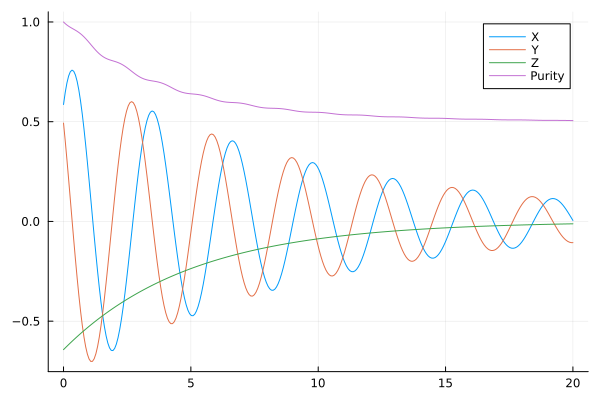

In [284]:
tspan = (0.0, 20.0)
ts = range(tspan..., length=300)
v0 = normalize!(rand(ComplexF64, 2))
ρ0 = v0 * v0'
prob = ODEProblem(du, ρ0, tspan, 0.1)
sol = solve(prob)
blochs = stack([real(QuantumDots.bloch_vector(sol(t), 1, Q)) for t in ts])';
plot(ts, blochs, label=["X" "Y" "Z"])

In [285]:
function plot_bloch(v; res=100)
    φ_range1 = range(0, stop=2 * π, length=res)
    λ_range1 = range(0, stop=π, length=7)
    φ_range2 = range(0, stop=π, length=7)
    λ_range2 = range(0, stop=2π, length=res)
    x1 = [cos(φ) * sin(λ) for φ ∈ φ_range1, λ ∈ λ_range1]
    y1 = [sin(φ) * sin(λ) for φ ∈ φ_range1, λ ∈ λ_range1]
    z1 = [cos(λ) for φ ∈ φ_range1, λ ∈ λ_range1]
    x2 = [cos(φ) * sin(λ) for φ ∈ φ_range2, λ ∈ λ_range2]
    y2 = [sin(φ) * sin(λ) for φ ∈ φ_range2, λ ∈ λ_range2]
    z2 = [cos(λ) for φ ∈ φ_range2, λ ∈ λ_range2]
    sp = plot(xlims=(-1, 1), ylims=(-1, 1), zlims=(-1, 1))
    foreach(n -> plot!(sp, x1[:, n], y1[:, n], z1[:, n], c=:black, legend=:none), eachindex(eachcol(z1)))
    foreach(n -> plot!(sp, x2[n, :], y2[n, :], z2[n, :], c=:black), eachindex(eachrow(z2)))
    ps = range(0,1,20)
    plot!(sp, ps * v[1], ps*v[2], ps*v[3], c=:red,  linewidth = 5, seriesalpha = ps)
    sp
    return
end

plot_bloch (generic function with 1 method)

┌ Info: Saved animation to c:\Users\svens\.julia\dev\QuantumDots\examples\anim_fps15.gif
└ @ Plots C:\Users\svens\.julia\packages\Plots\3BCH5\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\svens\\.julia\\dev\\QuantumDots\\examples\\anim_fps15.gif")
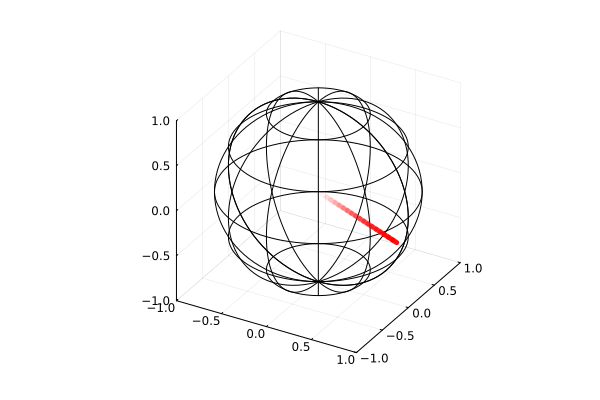

In [286]:
anim = @animate for t ∈ ts
    plot_bloch(real(QuantumDots.bloch_vector(sol(t), 1, Q)))
end
gif(anim, "anim_fps15.gif", fps = 15)